In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, uniform

In [3]:
def sqw_ops(N, theta_blue, theta_red, p):    
    II = np.eye(N)
    H_red  = np.zeros([N,N])
    H_blue = np.zeros([N,N])
    
    for x in range(N//2):
#         if uniform(0,1) > p
        if random() > p:
            H_red[2*x, 2*x + 1] = 1
            H_red[2*x + 1, 2*x] = 1

            H_blue[2*x + 1, (2*x + 2)%N] = 1
            H_blue[(2*x + 2)%N, 2*x + 1] = 1
        else: 
            H_red[2*x, 2*x] = 1
            H_red[2*x + 1, 2*x + 1] = 1

            H_blue[2*x + 1, 2*x + 1] = 1
            H_blue[(2*x + 2)%N, (2*x + 2)%N] = 1
        
    U_blue = np.cos(theta_blue)*II + 1j*np.sin(theta_blue)*H_blue
    U_red  = np.cos(theta_red)*II + 1j*np.sin(theta_red)*H_red
    
    return U_blue, U_red

### 1. Broken Links: One Shot

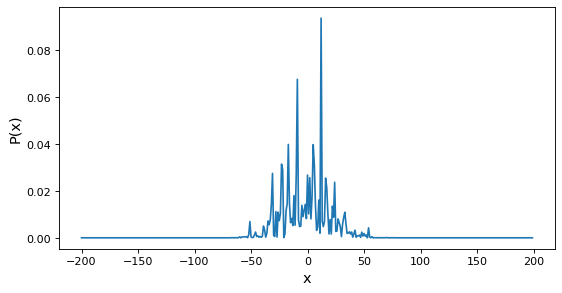

In [4]:
# Parameters
n = 200
N = 2*n
steps = 300 

# Angles
theta_blue = np.pi/3
theta_red  = np.pi/3

# Probability of Breaking a Link
p = 0.7

# Initial State
initial_state = np.zeros([N,1])
initial_state[n+1] = 1

# Evolution
for t in range(steps):
    U_blue, U_red = sqw_ops(N, theta_blue, theta_red, p)
    U = U_blue @ U_red
    initial_state = U @ initial_state
    
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(np.arange(0,N)-N//2,np.abs(initial_state)**2)
plt.xlabel('x',fontsize=13)
plt.ylabel('P(x)',fontsize=13)
plt.show()

### 2. Broken Links: Mean over Shots

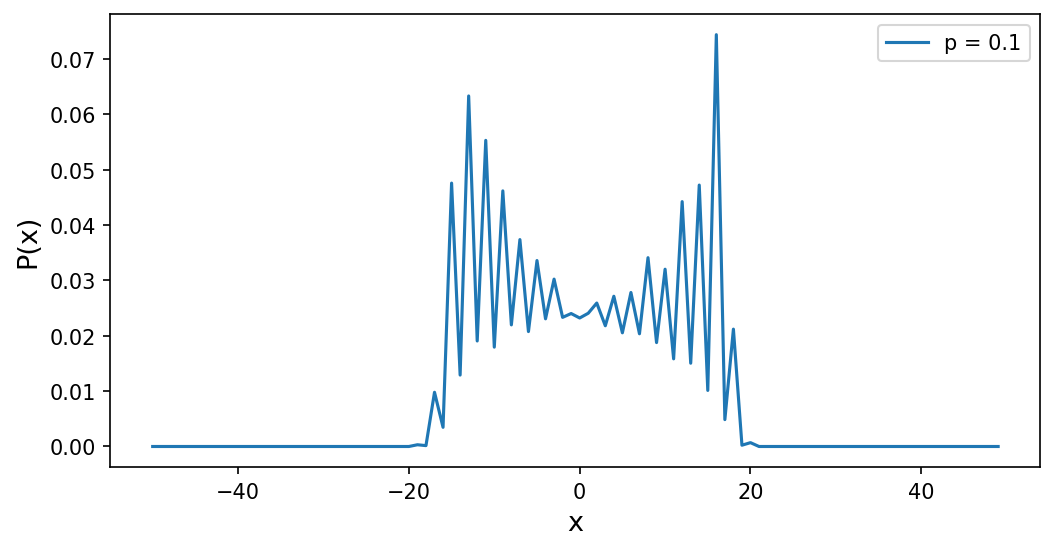

In [31]:
# Parameters
n = 50
N = 2*n
steps = 10 
exp_samples = 700

# Angles
theta_blue = np.pi/3
theta_red  = np.pi/3

# Probability of Breaking a Link
p_vec = [0.1]

# Evolution
plt.figure(figsize=(8, 4), dpi=150)
for p in p_vec:
    mean_value = np.zeros([N,1])
    for s in range(exp_samples):
        # Initial State
        initial_state = np.zeros([N,1])
        initial_state[n+1] = 1/np.sqrt(2)
        initial_state[n] = 1/np.sqrt(2)

        for t in range(steps):
            U_blue, U_red = sqw_ops(N, theta_blue, theta_red, p)
            U = U_blue @ U_red
            initial_state = U @ initial_state

        mean_value += np.abs(initial_state)**2/exp_samples
    
    
    plt.plot(np.arange(0,N)-N//2, mean_value)
    plt.xlabel('x',fontsize=13)
    plt.ylabel('P(x)',fontsize=13)
    
plt.legend([f'p = {p_vec[x]}' for x in range(len(p_vec))]) 
plt.show()

In [32]:
mu = 0
v = np.arange(0,N)-N//2
for x in range(N):
    mu += v[x]*mean_value[x]
    
print(mu)

[0.4465303]
